<a href="https://colab.research.google.com/github/Rogerio-mack/VLF/blob/main/VLF_plot_and__cache_narrow_amplitude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plot AWESOME files



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#@markdown imports
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.io as sio
import scipy.signal as sg
import numpy as np
import pandas as pd
import datetime as dt
import os
from matplotlib.pyplot import * # rcparms
from matplotlib.dates import num2date, date2num, DateFormatter

In [4]:
#@markdown auxiliar functions
def plot_is_cached(fname,type_signal='Narrowband'):

  import os
  path_cache = '/content/drive/MyDrive/VLF/plot_cache/' + type_signal + '/'
  png_files = [ x for x in os.listdir(path_cache) if '.png' in x ]
  if fname.split('.mat')[0]+'.png' in png_files:
    return True
  else:
    return False

def plot_cached(fname,type_signal='Narrowband'):

  import matplotlib.pyplot as plt
  import matplotlib.image as mpimg
  %matplotlib inline
  import os
  path_cache = '/content/drive/MyDrive/VLF/plot_cache/' + type_signal + '/'

  rcParams['figure.figsize'] = 7,4
  rcParams['figure.autolayout'] = True
  rcParams['font.size'] = 12

  img = mpimg.imread(path_cache + fname.split('.mat')[0] + '.png')

  plt.xticks([])
  plt.yticks([])
  imgplot = plt.imshow(img)
  plt.show()



# Plot Amplitude NARROWBAND

In [5]:
def plot_amplitude(mat_contents0,fname,save=True,replace=False):

  if not replace and plot_is_cached(fname):
    plot_cached(fname,type_signal='Narrowband')
    print('Warning: plot cached')
    return

  rcParams['figure.figsize'] = 7,4
  rcParams['figure.autolayout'] = True
  rcParams['font.size'] = 12

  channel_sampling_freq0 = mat_contents0['Fs']
  data_amp               = mat_contents0['data']
  callsign0              = fname[14:17]
  adc_channel0           = mat_contents0['adc_channel_number']
  start_day0             = mat_contents0['start_day']
  start_hour0            = mat_contents0['start_hour']
  start_minute0          = mat_contents0['start_minute']
  start_month0           = mat_contents0['start_month']
  start_second0          = mat_contents0['start_second']
  start_year0            = mat_contents0['start_year']
  station_name0          = mat_contents0['station_name']

  # maintenance 2023-10-19
  startdate0             = dt.datetime(start_year0[0,0],start_month0[0,0],start_day0[0,0],start_hour0[0,0],start_minute0[0,0],start_second0[0,0])
  #

  time0                  = pd.date_range(str(startdate0), periods=len(data_amp),
                                        freq=str(channel_sampling_freq0)[2:3]+' s')

  figure, (ax0)=subplots(1)    #, sharex=True, sharey=False)
  ax0.plot(time0, mat_contents0['data'])
  ax0.set_ylabel('Averaged Amplitude [dB]')
  ax0.set_xlabel('Time (UT Hours)')
  ax0.xaxis.set_major_formatter(DateFormatter('%H:%M'))
  ax0.set_ylim(0,np.nanmax( mat_contents0['data'] ))
  ax0.grid(True)

  # maintenance 2023-10-19
  if adc_channel0 == 0:
    ax0.set_title(''.join(map(lambda num: chr(num[0]),station_name0))+' '+ str(startdate0)[0:10]+' '+ str(callsign0) + ' Amplitude, N/S Antenna')
  elif adc_channel0 == 1:
    ax0.set_title(''.join(map(lambda num: chr(num[0]),station_name0))+' '+ str(startdate0)[0:10]+' '+ str(callsign0) + ' Amplitude, E/W Antenna')
  else:
    ax0.set_title(''.join(map(lambda num: chr(num[0]),station_name0))+' '+ str(startdate0)[0:10]+' '+ str(callsign0) + ' Amplitude')
  #

  plt.show()

  if save:
    figure.savefig('/content/drive/MyDrive/VLF/plot_cache/Narrowband/' + fname.split('.mat')[0] + '.png', format='png')

  return figure


/content/drive/MyDrive/VLF/VLFTesteGraphs/B1070710000500NAA_006A.mat


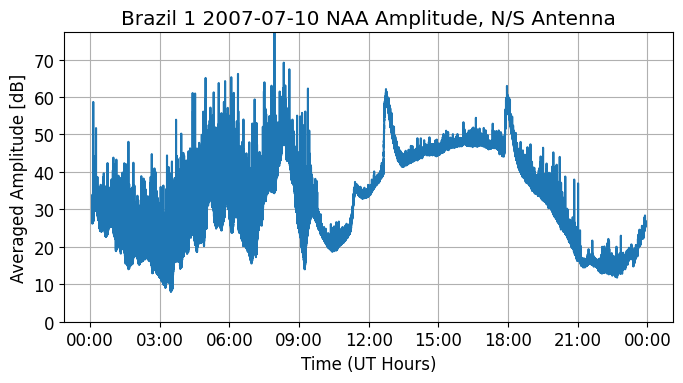

/content/drive/MyDrive/VLF/VLFTesteGraphs/B1070710000500NAA_006B


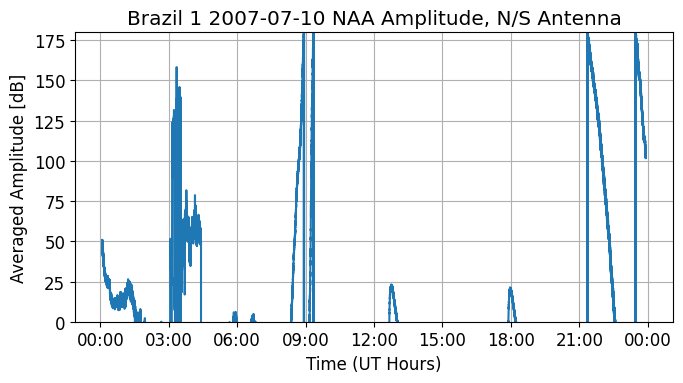

In [7]:
path = '/content/drive/MyDrive/VLF/VLFTesteGraphs'

mat_files = [ x for x in os.listdir(path) if '.mat' in x ]

for f in ['B1070710000500NAA_006A.mat','B1070710000500NAA_006B']:
  print(os.path.join(path,f))
  data = sio.loadmat(os.path.join(path,f))
  plot_amplitude(data,f,replace=True)
